C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


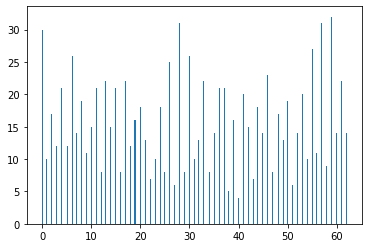

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import cmath
%matplotlib inline
pdivs=100
ddivs=64
s1 = genfromtxt('s1_pm_64.txt', delimiter=',')
s2 = genfromtxt('s2_pm_64.txt', delimiter=',')
m11 = genfromtxt('m11_pm_64.txt', delimiter=',')
m12 = genfromtxt('m12_pm_64.txt', delimiter=',')
temp = 1j * s1[:, 2]
temp += s1[:, 1]
s1 = temp
temp = 1j * s2[:, 2]
temp += s2[:, 1]
s2 = temp

m11 = m11[:, 1]
m12 = m12[:, 1]
theta_s=np.linspace(0,np.pi,ddivs)
phi_s=np.linspace(0,2*np.pi,ddivs)
p=np.zeros((ddivs,ddivs))
s=np.zeros(4)
s[0]=1
s[1]=-0.519333
s[2]=0.844785
for i, theta in enumerate(theta_s):
    for j,phi in enumerate(phi_s):
        p[i,j]=m11[i]*s[0]+m12[i]*(s[1]*cmath.cos(2*j*2*cmath.pi/ddivs)+s[2]*cmath.sin(2*j*2*cmath.pi/1000))


        
p_theta=np.sum(p,axis=1)
p_theta/=np.sum(p_theta)
p_phi=np.sum(p,axis=0)
p_phi/=np.sum(p_phi)
p_theta_cs=np.cumsum(p_theta)
p_phi_cs=np.cumsum(p_phi)
inverse_p_theta=np.zeros(pdivs)
inverse_p_phi=np.zeros(pdivs)

inverse_p_theta[int(p_theta_cs[0]*(pdivs-1))]=0
for i in range(1,len(p_theta_cs)):    
    idx = int(p_theta_cs[i]*(pdivs-1))
    j=i-1
    while idx == int(p_theta_cs[j]*(pdivs-1)):
        j-=1
    inverse_p_theta[idx]=j+1
    
for i, el in enumerate(inverse_p_theta):
    if el ==0 and i>0:
        inverse_p_theta[i]=inverse_p_theta[i-1]    
        
        
inverse_p_phi[int(p_theta_cs[0]*(pdivs-1))]=0
for i in range(1,len(p_theta_cs)):    
    idx = int(p_phi_cs[i]*(pdivs-1))
    j=i-1
    while idx == int(p_phi_cs[j]*(pdivs-1)):
        j-=1
    inverse_p_phi[idx]=j+1
    
for i, el in enumerate(inverse_p_phi):
    if el ==0 and i>0:
        inverse_p_phi[i]=inverse_p_phi[i-1] 
        
rand=np.array(np.random.random(1000)*(pdivs-1),dtype=np.int)
plt.hist(inverse_p_phi[rand],300)
plt.show()
#print(m11)

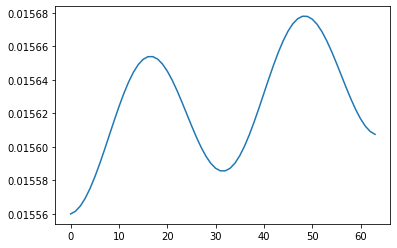

In [12]:
plt.plot(p_phi)
plt.show()



In [3]:
inverse_p_theta



array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,
        3.,  4.,  9., 10., 12., 18., 20., 21., 23., 26., 29., 31., 33.,
       34., 35., 37., 39., 41., 43., 43., 44., 45., 46., 47., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 55., 56., 56., 57., 57., 58.,
       58., 58., 59., 59., 60., 60., 60., 61., 61., 61., 61., 61., 61.,
       61., 61., 61., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62.,
       62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62., 62.,
       62., 62., 62., 62., 62., 62., 62., 63., 63.])

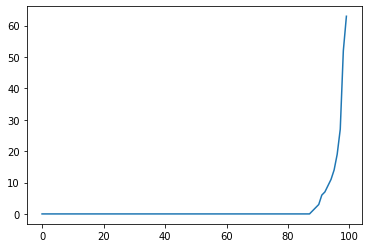

In [3]:
neg=inverse_p_theta[:-1]-inverse_p_theta[1:]
pos=inverse_p_theta[1:]-inverse_p_theta[:-1]
for i, el in enumerate(inverse_p_theta):
    if el ==0 and i>0:
        inverse_p_theta[i]=inverse_p_theta[i-1]
plt.plot(inverse_p_theta)
plt.show()

In [4]:
import numpy as np

ddivs=64
s1 = genfromtxt('s1_pm_64.txt', delimiter=',')
s2 = genfromtxt('s2_pm_64.txt', delimiter=',')
s11 = genfromtxt('m11_pm_64.txt', delimiter=',')
s12 = genfromtxt('m12_pm_64.txt', delimiter=',')
temp = 1j * s1[:, 2]
temp += s1[:, 1]
s1 = temp
temp = 1j * s2[:, 2]
temp += s2[:, 1]
s2 = temp

s11 = s11[:, 1]
s12 = s12[:, 1]
stokes=np.zeros(4)
pf=np.zeros((ddivs,ddivs))
pf_theta=np.zeros(ddivs)
pf_phi=np.zeros(ddivs)
stokes[0]=1
stokes[1]=-0.8
stokes[2]=0.5

for i in range(ddivs):
    for j in range(ddivs):
        # theta = i * cmath.pi / ddivs
        # phi = j * cmath.pi * 2 / ddivs
        pf[i, j] = (s11[i] * stokes[0] + s12[i] * (
                stokes[1] * cmath.cos(2 * j * 2 * cmath.pi / ddivs) + stokes[2] * cmath.sin(
            2 * j * 2 * cmath.pi / ddivs))).real
for i in range(ddivs):
    pf_theta[i] = 0
    pf_phi[i] = 0
for i in range(ddivs):
    for j in range(ddivs):
        pf_theta[i] += pf[i, j]
        pf_phi[j] += pf[i, j]

pf_theta_sum = 0
pf_phi_sum = 0
for i in range(ddivs):
    pf_theta_sum += pf_theta[i]
    pf_phi_sum += pf_phi[i]

for i in range(ddivs):
    pf_theta[i] /= pf_theta_sum
    pf_phi[i] /= pf_phi_sum

p_theta_cs[0] = pf_theta[0]
p_phi_cs[0] = pf_phi[0]
for i in range(1, ddivs):
    p_theta_cs[i] = p_theta_cs[i - 1] + pf_theta[i]
    p_phi_cs[i] = p_phi_cs[i - 1] + pf_phi[i]
    if p_theta_cs[i]>1:
        p_theta_cs[i]=1
    if p_phi_cs[i]>1:
        p_phi_cs[i]=1

for i in range(pdivs):
    inverse_p_theta[i]=0
    inverse_p_phi[i]=0

inverse_p_theta[int(p_theta_cs[0] * (pdivs - 1))] = 0
inverse_p_phi[int(p_phi_cs[0] * (pdivs - 1))] = 0
for i in range(1,ddivs):
    idx = int(p_theta_cs[i] * (pdivs - 1))
    j = i - 1
    while idx == int(p_theta_cs[j] * (pdivs - 1)):
        j -= 1
    inverse_p_theta[idx] = j + 1

for i in range(1,ddivs):
    idx = int(p_theta_cs[i] * (pdivs - 1))
    j = i - 1
    while idx == int(p_theta_cs[j] * (pdivs - 1)):
        j -= 1
    inverse_p_phi[idx] = j + 1

for i in range(pdivs):
    el=inverse_p_theta[i]
    if el == 0 and i > 0:
        inverse_p_theta[i] = inverse_p_theta[i - 1]

for i in range(pdivs):
    el = inverse_p_phi[i]
    if el == 0 and i > 0:
        inverse_p_phi[i] = inverse_p_phi[i - 1]


#print('int(rand_0[0] * (pdivs - 1)',int(rand_0[0] * (pdivs - 1)))


print('sum',pf_phi_sum)
print('rand',int(np.random.random() * (pdivs - 1)))
print('rand1', int(np.random.random()* (pdivs - 1)))
# for i in range(pdivs):
#     print(i, 'inv', inverse_p_theta[i])

theta_out = inverse_p_theta[int(np.random.random() * (pdivs - 1))] * cmath.pi / ddivs
phi_out = inverse_p_phi[int(np.random.random() * (pdivs - 1))] * 2 * cmath.pi / ddivs

sum 4494639.273544542
rand 64
rand1 13


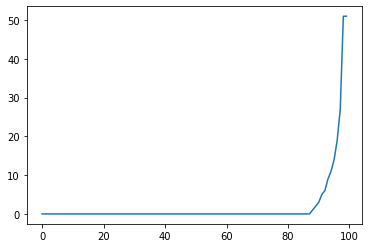

In [5]:
plt.plot(inverse_p_theta)
plt.show()

In [1]:
from time import sleep
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(3)):
    for j in tqdm_notebook(range(5)):
        sleep(0.1)
        print(i," : ", j)

print("Done!")



0  :  0
0  :  1
0  :  2
0  :  3
0  :  4

1  :  0
1  :  1
1  :  2
1  :  3
1  :  4

2  :  0
2  :  1
2  :  2
2  :  3
2  :  4


Done!


In [2]:
import cmath

print(cmath.atan(-1))



(-0.7853981633974483+0j)


In [6]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import cmath
%matplotlib inline
pdivs=100
ddivs=64
s1 = genfromtxt('s1_pm_360.txt', delimiter=',')
print(s1.shape)


(360, 3)


In [1]:
import numpy as np

np.random.random((2,3))



array([[0.19853642, 0.53231133, 0.34403922],
       [0.43908423, 0.01878544, 0.66305308]])